<a href="https://colab.research.google.com/github/PamelaKinga/preprocessing_methods/blob/main/Encoding_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***In progress.*** 🔜 

# Pre-Steps

## Connect to Gdrive & Kaggle

In [14]:
# First mount Gdrive to Colab for these steps to work
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


## Download data

In [15]:
# Connect to a data source for examples
! kaggle datasets download -d crawford/80-cereals 

80-cereals.zip: Skipping, found more recently modified local copy (use --force to force download)


[Kaggle's 80 cereals data set](https://www.kaggle.com/datasets/crawford/80-cereals)

In [16]:
! unzip 80-cereals.zip

Archive:  80-cereals.zip
replace cereal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('cereal.csv')

In [19]:
df.shape # 77 rows, 16 columns

(77, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [21]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Introduction

## Why it matters

Various encoding techniques are applied to categorical variables in data sets. This is important so that the mathematical procedures that make up the majority of machine learning algorithms can be effectively applied.

## Types of categorical features

Understanding the types of categorical variables as this determines the techniques or methods applied: 
1.   Nominal
2.   Ordinal

**Nominal variables:** A nominal variable is a type of variable that is used to name, label or categorize particular attributes that are being measured. Examples (Gender = {F,M,Other}, Country = {Canada, Austria, etc...}, Color = {Blue, Red, Green, ...})

**Ordinal variables:** Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories are not known. Examples (Education = {High School, Post-Secondary, Masters, PhD}, Level = {Bronze, Silver, Gold, Platinum})


## Example Dataset

Example from 80 Cereals Data set


```
# df.head()
```



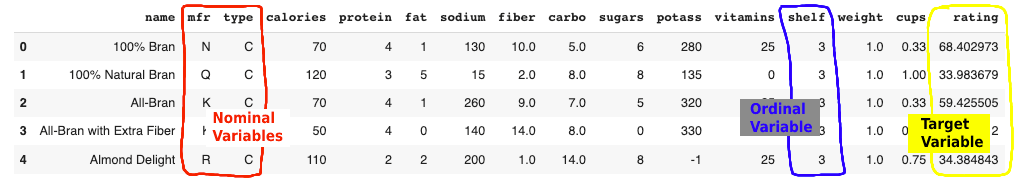

In [26]:
# Let's see how many labels exist in the categorical variables
categories = df[["mfr", "type", "shelf"]] # create a dataframe with just the categorical variables

In [27]:
for col in categories.columns:
  print(col,': ', len(categories[col].unique()), 'labels')

mfr :  7 labels
type :  2 labels
shelf :  3 labels


In [28]:
# Create a df with just the nominal features
nominal = df[["mfr", "type"]] # create a dataframe with just the categorical variables

In [29]:
# Let's see how many columns we obtain after one hot encoding these variables
pd.get_dummies(nominal, drop_first=True).shape

(77, 7)

Not terrible, from 2 nominal categorical features we increase to 7 columns total in the feature space, after one hot encoding



## Nominal encoding techniques

There are three types of nominal encoding techniques


1.   One hot encoding
2.   One hot encoding with many categorical variables
3.   Mean encoding




## Ordinal encoding techniques


There are three types of ordinal encoding techniques

1.   Label encoding
2.   Target guided ordinal encoding


# Applied Techniques

## Nominal: one hot encoding

**Con:** If a variable has a lot of categories, then a one-hot encoding scheme will produce many columns, which can cause memory issues.

## Nominal: one hot encoding variables with many categories

One hot encoding multiple columns can be problematic. This is because it causes an increase in the dimensionality of the dataset.
High dimensional models can lead to problems like parallelism and multicollinearity.

### Data

Data from Mercedez Bendz Kaggle must be manually downloaded [here](https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/data) and dropped into Google Drive to be read below

The Mercedes Benz data set is a good example of multiple features with categorical data having many labels

In [33]:
! unzip mercedes-benz-greener-manufacturing.zip

Archive:  mercedes-benz-greener-manufacturing.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [34]:
benz_df = pd.read_csv('train.csv.zip')

### EDA

Exploratory Data Analysis

In [40]:
#Review the training data
benz_df.shape # 4209 rows, 378 columns

(4209, 378)

In [41]:
# There are too many columns to run the df.dtypes function, instead filter to show all data types that are object
benz_df.dtypes[benz_df.dtypes == 'object'] # 8 columns

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

Unfortunately, these features are anonymized. Documentation uploaded by Mercedes Benz does not contain meta data describing each feature. What this means is that intuition or domain knowledge will not help us to understand or explore the features, adding to feature selection. A positive: this could be seen as totally unbiased.

In [42]:
# Let's see how many labels exist in the categorical variables
objects = benz_df[["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]] # create a dataframe with just the categorical variables

for col in objects.columns:
  print(col,': ', len(objects[col].unique()), 'labels')

X0 :  47 labels
X1 :  27 labels
X2 :  44 labels
X3 :  7 labels
X4 :  4 labels
X5 :  29 labels
X6 :  12 labels
X8 :  25 labels


In [43]:
# Let's see how many columns we obtain after one hot encoding these variables
pd.get_dummies(objects, drop_first=True).shape # 187 columns

(4209, 187)

In [44]:
#Peak at the categorical features
objects.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


### One hot encoding

As shown by the explosion in columns from the one-hot encoding method (8 ➡ 187) its inefficient to maintain such a high dimensional feature set. Even though this is still not overwhelming and can be easily handled, in practice, categorical data with many labels can become problematic. 

One idea is to limit one hot encoding to the top n most frequent labels of the categorical variable. 

For example, the variable X0 has 47 unique labels. Let's determine which are the top 10 labels (selecting n labels to include is arbitrary at this point).

In [70]:
# Find the top 10 most frequent categories for the variable X0

benz_df.X0.value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [64]:
# Make a list with the most frequent categories of the variable

top10 = [x for x in benz_df.X0.value_counts().sort_values(ascending=False).head(10).index]
top10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [65]:
# Make the 10 binary variables

for label in top10:
  benz_df[label] = np.where(benz_df['X0']==label, 1, 0)

benz_df[['X0']+top10].head(10)

,X0,z,ak,y,ay,t,x,o,f,n,w
0,k,0,0,0,0,0,0,0,0,0,0
1,k,0,0,0,0,0,0,0,0,0,0
2,az,0,0,0,0,0,0,0,0,0,0
3,az,0,0,0,0,0,0,0,0,0,0
4,az,0,0,0,0,0,0,0,0,0,0
5,t,0,0,0,0,1,0,0,0,0,0
6,al,0,0,0,0,0,0,0,0,0,0
7,o,0,0,0,0,0,0,1,0,0,0
8,w,0,0,0,0,0,0,0,0,0,1
9,j,0,0,0,0,0,0,0,0,0,0


In [67]:
# Get the whole set of dummy variables, for all the categorical variables 

def one_hot_top_x(data,variable,top_x_labels):
  #function to create the dummy variables for the most frequent labels
  #we can vary the number of most frequent labels to encode

  for label in top_x_labels:
    data[variable+'_'+label]= np.where(data[variable] ==label, 1, 0)

#read data again
data = pd.read_csv('train.csv.zip', usecols=["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"])

#encode X0 into the 10 most frequent categories
one_hot_top_x(data, 'X0', top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X0_aa,X0_s,X0_b,X0_l,X0_v
0,k,v,at,a,d,u,j,o,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0


In [68]:
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head().index]

#create
one_hot_top_x(data, 'X2',top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X0_aa,X0_s,X0_b,X0_l,X0_v,X2_as,X2_ae,X2_ai,X2_m,X2_ak
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0


In [69]:
top_10 = [x for x in data.X3.value_counts().sort_values(ascending=False).head().index]

#create
one_hot_top_x(data, 'X3',top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X0_aa,X0_s,...,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X3_c,X3_f,X3_a,X3_d,X3_g
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,0,0,0,1,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,1,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,1,0,0,0


## Nominal: Mean (target) encoding


What is Mean (target) Encoding? Target encoding involves replacing a categorical feature with its average target value for all data points belonging to the category. For each distinct element in x you’re going to compute the average of the corresponding values in y.

**Pro:** Picks up values that can explain the target.

**Con:** Introduces likelihood of over-fitting. Relying on an average value isn’t always a good idea when the number of values used in the average is low. You’ve got to keep in mind that the dataset you’re training on is a sample of a larger set. Therefore, we’re over-fitting because we don’t have enough values to be sure that 0 is in fact the mean value of *y* when *x1* is equal to *d*. **To handle this:** A popular way is to use *cross-validation * and compute the means in each out-of-fold dataset.

In [ ]:
benz_df.head()

In [51]:
benz_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [59]:
# Generate the mean values of X0
benz_df['mean_ecX2'] = benz_df.groupby('X2')['y'].mean()

In [60]:
benz_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X377,X378,X379,X380,X382,X383,X384,X385,mean_ecX0,mean_ecX2
0,0,130.81,k,v,at,a,d,u,j,o,...,1,0,0,0,0,0,0,0,NaN,NaN
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,0,0,0,0,NaN,NaN
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,1,0,0,0,NaN,NaN
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,NaN,NaN
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,NaN,NaN
